# Correction Exercice 3 : Régression Logistique - Prédiction de Défaut de Paiement

## Partie 1 : Exploration et Preprocessing

### Question 1.1 : Chargement et exploration initiale

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    accuracy_score
)

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
df = pd.read_excel(url, header=1)

df = df.rename(columns={'default payment next month': 'default'})

df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

### Question 1.2 : Analyse de la variable cible

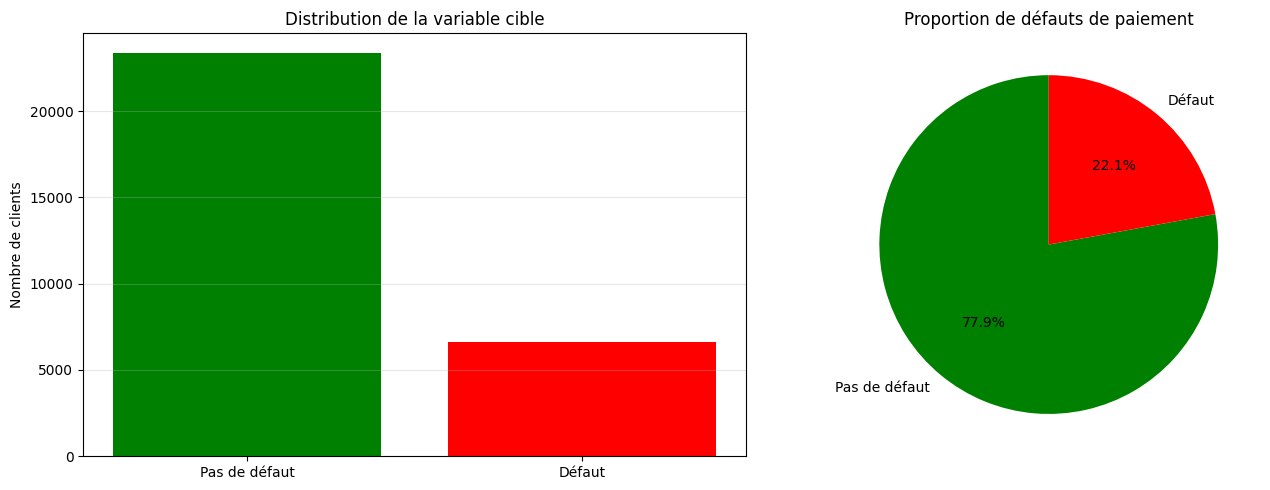

In [3]:
default_counts = df['default'].value_counts()
default_prop = df['default'].value_counts(normalize=True)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].bar(['Pas de défaut', 'Défaut'], default_counts.values, color=['green', 'red'])
axes[0].set_ylabel('Nombre de clients')
axes[0].set_title('Distribution de la variable cible')
axes[0].grid(axis='y', alpha=0.3)

axes[1].pie(default_counts.values, labels=['Pas de défaut', 'Défaut'], 
            autopct='%1.1f%%', colors=['green', 'red'], startangle=90)
axes[1].set_title('Proportion de défauts de paiement')

plt.tight_layout()
plt.show()

### Question 1.3 : Analyse des variables catégorielles

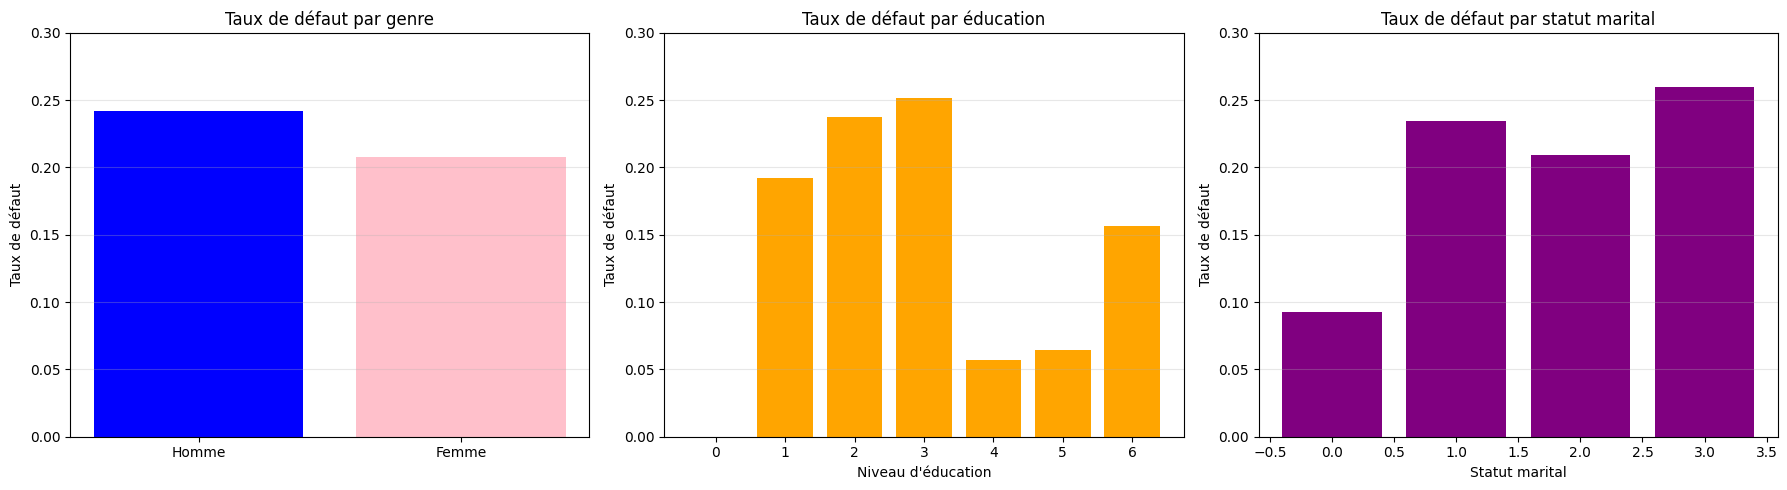

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sex_rate = df.groupby('SEX')['default'].mean()
axes[0].bar(['Homme', 'Femme'], sex_rate.values, color=['blue', 'pink'])
axes[0].set_ylabel('Taux de défaut')
axes[0].set_title('Taux de défaut par genre')
axes[0].set_ylim([0, 0.3])
axes[0].grid(axis='y', alpha=0.3)

edu_rate = df.groupby('EDUCATION')['default'].mean()
axes[1].bar(edu_rate.index, edu_rate.values, color='orange')
axes[1].set_xlabel('Niveau d\'éducation')
axes[1].set_ylabel('Taux de défaut')
axes[1].set_title('Taux de défaut par éducation')
axes[1].set_ylim([0, 0.3])
axes[1].grid(axis='y', alpha=0.3)

marriage_rate = df.groupby('MARRIAGE')['default'].mean()
axes[2].bar(marriage_rate.index, marriage_rate.values, color='purple')
axes[2].set_xlabel('Statut marital')
axes[2].set_ylabel('Taux de défaut')
axes[2].set_title('Taux de défaut par statut marital')
axes[2].set_ylim([0, 0.3])
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### Question 1.4 : Analyse des variables numériques

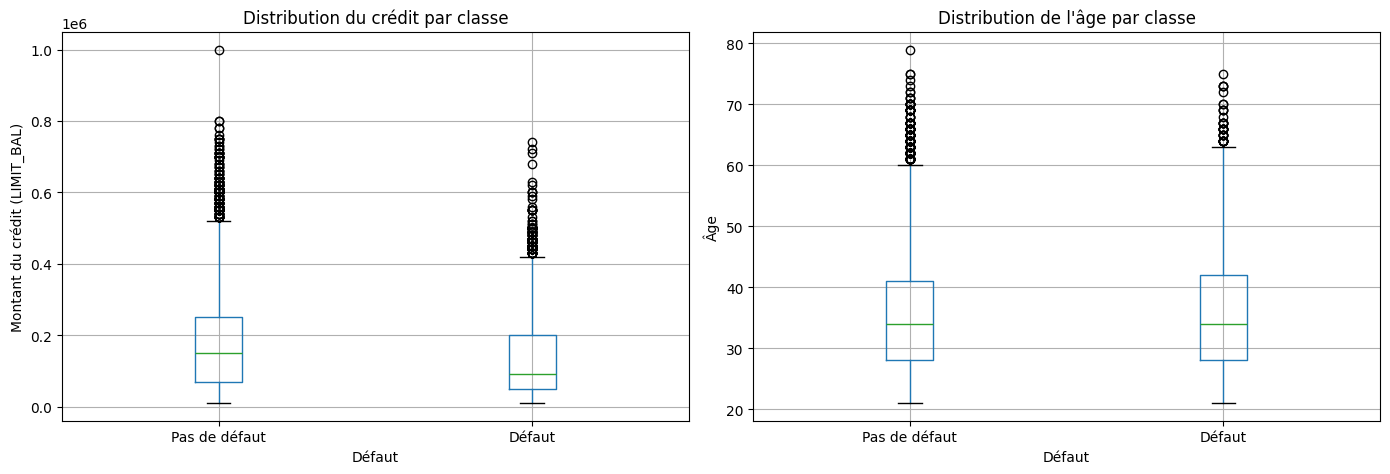

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df.boxplot(column='LIMIT_BAL', by='default', ax=axes[0])
axes[0].set_xlabel('Défaut')
axes[0].set_ylabel('Montant du crédit (LIMIT_BAL)')
axes[0].set_title('Distribution du crédit par classe')
axes[0].set_xticklabels(['Pas de défaut', 'Défaut'])
plt.sca(axes[0])
plt.xticks([1, 2], ['Pas de défaut', 'Défaut'])

df.boxplot(column='AGE', by='default', ax=axes[1])
axes[1].set_xlabel('Défaut')
axes[1].set_ylabel('Âge')
axes[1].set_title('Distribution de l\'âge par classe')
axes[1].set_xticklabels(['Pas de défaut', 'Défaut'])
plt.sca(axes[1])
plt.xticks([1, 2], ['Pas de défaut', 'Défaut'])

plt.suptitle('')
plt.tight_layout()
plt.show()

### Question 1.5 : Feature Engineering

In [6]:
df_processed = df.copy()

# Formule : (Montant moyen des factures) / (Limite de crédit)

bill_cols = [f'BILL_AMT{i}' for i in range(1, 7)]  # Colonnes BILL_AMT1 à BILL_AMT6

# Calcul du taux d'utilisation moyen sur 6 mois
df_processed['utilization_rate'] = df_processed[bill_cols].mean(axis=1) / df_processed['LIMIT_BAL']

# Gestion des cas particuliers (division par 0, valeurs infinies)
df_processed['utilization_rate'] = df_processed['utilization_rate'].replace([np.inf, -np.inf], 0).fillna(0)


# Formule : (Montant moyen des paiements) / (Montant moyen des factures)

pay_amt_cols = [f'PAY_AMT{i}' for i in range(1, 7)]

# Calcul de la moyenne des factures et des paiements sur 6 mois
avg_bill = df_processed[bill_cols].mean(axis=1)
avg_payment = df_processed[pay_amt_cols].mean(axis=1)

# Calcul du ratio paiement/facture
df_processed['payment_ratio'] = avg_payment / avg_bill

df_processed['payment_ratio'] = df_processed['payment_ratio'].replace([np.inf, -np.inf], 0).fillna(0)

# Les colonnes sont PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6 (pas de PAY_1)

pay_cols = ['PAY_0'] + [f'PAY_{i}' for i in range(2, 7)]

# Remplacer les valeurs négatives par 0 (valeurs négatives = paiements anticipés)
# puis sommer tous les retards pour obtenir un retard total
df_processed['total_delay'] = df_processed[pay_cols].apply(lambda x: x.clip(lower=0)).sum(axis=1)


## Partie 2 : Préparation des Données avec Pipeline Scikit-Learn

### Question 2.1 : Création du Pipeline de Preprocessing

In [7]:
numeric_features = [
    'LIMIT_BAL', 'AGE',
    'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
    'utilization_rate', 'payment_ratio', 'total_delay'
]

categorical_features = ['EDUCATION', 'MARRIAGE', 'SEX']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

### Question 2.2 : Séparation Train/Test

In [8]:
X = df_processed.drop(['default', 'ID'], axis=1)
y = df_processed['default']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

### Question 2.3 : Création du Pipeline Complet (Preprocessing + Modèle)

## Partie 3 : Entraînement et Évaluation du Modèle

### Question 3.1 : Pipeline Complet et Entraînement

In [9]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

pipeline.fit(X_train, y_train)

y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

train_score = pipeline.score(X_train, y_train)
test_score = pipeline.score(X_test, y_test)

print(f"train : {train_score:.4f}")
print(f"test  : {test_score:.4f}")

train : 0.8107
test  : 0.8090


## Évaluation Complète du Modèle

### Métriques de Performance

In [10]:
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

print(f"\nAccuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1-Score  : {f1:.4f}")


Accuracy  : 0.8090
Precision : 0.6602
Recall    : 0.2811
F1-Score  : 0.3943


### Rapport de Classification Complet

In [11]:
print(classification_report(y_test, y_pred_test, 
                          target_names=['Pas de défaut', 'Défaut'],
                          digits=4))

               precision    recall  f1-score   support

Pas de défaut     0.8245    0.9589    0.8866      4673
       Défaut     0.6602    0.2811    0.3943      1327

     accuracy                         0.8090      6000
    macro avg     0.7423    0.6200    0.6405      6000
 weighted avg     0.7881    0.8090    0.7777      6000



### Matrice de Confusion

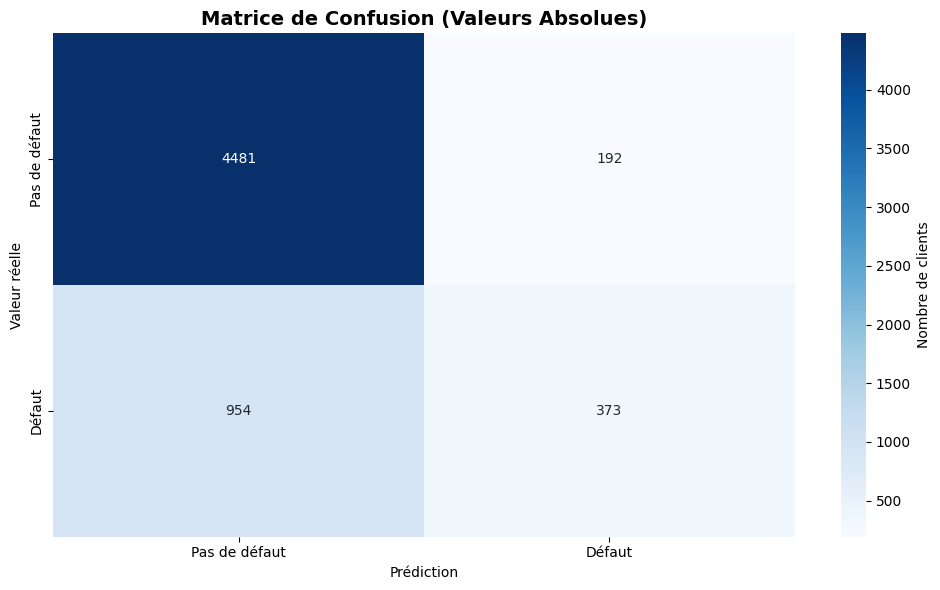

In [12]:
cm = confusion_matrix(y_test, y_pred_test)

fig, axes = plt.subplots(1, 1, figsize=(10, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Pas de défaut', 'Défaut'],
            yticklabels=['Pas de défaut', 'Défaut'],
            ax=axes, cbar_kws={'label': 'Nombre de clients'})
axes.set_xlabel('Prédiction')
axes.set_ylabel('Valeur réelle')
axes.set_title('Matrice de Confusion (Valeurs Absolues)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()